<p style="text-align:center">
    <a href="https://www.ict.mahidol.ac.th/en/" target="_blank">
    <img src="https://www3.ict.mahidol.ac.th/ICTSurveysV2/Content/image/MUICT2.png" width="400" alt="Faculty of ICT">
    </a>
</p>

# Lab06: Introduction to Statistical Learning


This lab assignment will provide hands-on practice in introductory statistical learning using the real-world Melbourne House Prices dataset collected in 2017. You will learn how to train a model (estimator function) to predict numerical house prices, and how to measure the errors of the model. 

Furthermore, this lab also addresses core machine learning concepts including hold-out validation, linear regression, and logistic regression, and provides practical experience in evaluating model performance through error analysis. You will learn how to implement train/test splits, fit linear and logistic regression models, calculate error distances per data point, and quantify prediction errors, including error counts and error rates.

## This tutorial aims to teach you how to:
* Train models (estimator functions) to predict numerical house prices, Melbourne House Prices dataset (2017).
* Implement hold-out validation (train/test split).
* Measure and analyze model errors.
* Fit and predict with linear regression models (regression task)
* Calculate error distance per data point, and count errors.
* Fit and predict with logistic regression models (binary classification task).
* Count errors and calculate error rates for logistic regression.

__Intructions:__
1. Append your ID at the end of this jupyter file name. For example, ```ITCS227_Lab06_Assignment_6788123.ipynb```
2. Complete each task in the lab.
3. Once finished, raise your hand to call a TA.
4. The TA will check your work and give you an appropriate score.
5. Submit the source code to MyCourse as record-keeping.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## 1. Load the dataset with a Numeric Target (Dataset for Regression)

###### Diabetes Dataset (Optional extra for your own investigation):

**Diabetes Dataset Description**

* Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

* Number of Instances: 442
* Number of Attributes: First 10 columns are numeric predictive values
* Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:

* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Response Attribute Information:

* For our tutorial, we will interpret:
  * `y=0` value to mean there is no disease progression after 1 year.
  * `y>0` means there has been a degree of disease progression (larger numbers mean larger progression).

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see: Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [2]:
from sklearn.datasets import load_diabetes
# Load a dataset
data = load_diabetes(scaled=False)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['y'] = data.target # y = "measure of disease progression one year after baseline"

features = ['bmi'] #  # Use only one feature: bmi - Body Mass Index
target = ['y']

print("Original DataFrame Info:")
print(df.info())
print('Note: y is the target, which is a "Measure of disease progression, one year after baseline measurement."')
print('We will interpret a `y=0` value to mean there is no disease progression after 1 year. Whereas a `y>0` means there has been progression.')

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
Note: y is the target, which is a "Measure of disease progression, one year after baseline measurement."
We will interpret a `y=0` value to mean there is no disease progression after 1 year. Whereas a `y>0` means there has been progression.


In [3]:
print('Number of Records,  Features: ', df.shape)
print('Head of dataframe, for two example records:')
display(df.head(2))

Number of Records,  Features:  (442, 11)
Head of dataframe, for two example records:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0


### Melbourne House Prices Dataset: (2017)

In [4]:
# Load a real-world dataset (using the small-sampled Melbourne Housing dataset)
try:
    df = pd.read_csv('files/melb_data.csv').drop('Unnamed: 0',axis=1) # Try to use the local file
except FileNotFoundError:
    print("melb_data.csv not found locally.")

print("Original DataFrame Info:")
print(df.info())

cols_to_use = ['Distance','Landsize','BuildingArea','Rooms', 'Bathroom', 'Price']

df = df.dropna()

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-

Number of Records,  Features:  (6196, 21)
Head of dataframe, for two example records:


,Distance,Price
1,2.5,1035000.0
2,2.5,1465000.0


The Y Price (target feature) is in Australian Dollars (AUD $). It shows the recorded price for the house or property.
The X Distance (input feature) is the distance (KM) from the Central Business District in Melbourne (near the water on the map)


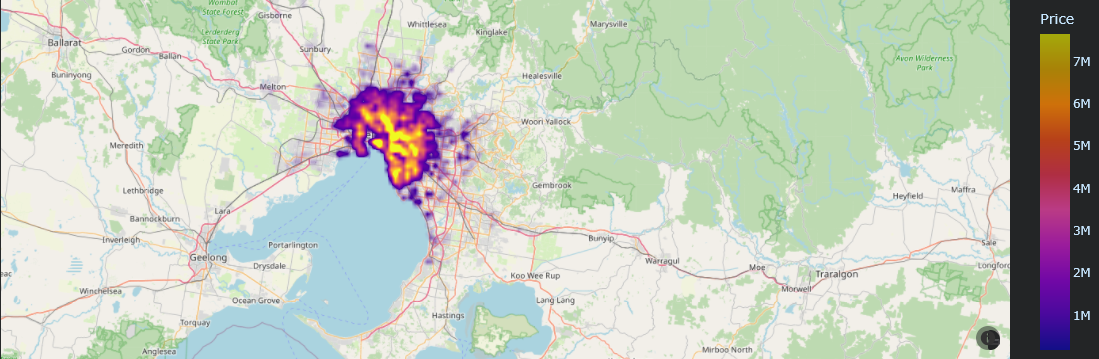

In [5]:
features = ['Distance']
target = ['Price']

print('Number of Records,  Features: ', df.shape)
print('Head of dataframe, for two example records:')
display(df[features+target].head(2))

print('The Y Price (target feature) is in Australian Dollars (AUD $). It shows the recorded price for the house or property.')
print('The X Distance (input feature) is the distance (KM) from the Central Business District in Melbourne (near the water on the map)')
Image(filename="files/MelbourneHousingMap.png")

```



```
## 2. Train / Test Set Split:


First we collect the `X` (inputs) and `y` (outputs) from the complete dataset.

Then we will split the full dataset into `train set` and `test set`. 

This let's us `(1) train` and `(2) test (or evaluate)` the **estimator function** - our model. The test set will represent how it might perform on real-world input data.

In [6]:
print("First, let's separate the X features from the Y target feature(s)\n")

X = df[features].to_numpy()
y = df[target].to_numpy()

y_min = y.min()
y_max = y.max()

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f'{target} - Target feature value range (Min-Max): {y_min:,.1f}-{y_max:,.1f}')
display(df[features+target].describe())

First, let's separate the X features from the Y target feature(s)

X shape: (6196, 1), y shape: (6196, 1)
['Price'] - Target feature value range (Min-Max): 131,000.0-9,000,000.0


,Distance,Price
count,6196.000000,6.196000e+03
mean,9.751097,1.068828e+06
std,5.612065,6.751564e+05
min,0.000000,1.310000e+05
25%,5.900000,6.200000e+05
50%,9.000000,8.800000e+05
75%,12.400000,1.325000e+06
max,47.400000,9.000000e+06


```



```


### Hold-out Method:
- We choose the `Hold-out method` uses % splitting method, to separate the `train set` from the `test set`.
- It uses random sampling to retrieve a "fair" subset from across the full dataset, such that each row in both sets has been randomly selected.
- 85% is sometimes seen as a middle-ground value, between 95% (common in removing outliers) and 50% (too little data for training, possibly too small for model fitting, relative to testing). A test set larger than 5% helps produce ensure the test set is representative of the real-world data that the model may encounter.

In [7]:
from sklearn.model_selection import train_test_split

# Split into 85% training and 15% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5266, 1), y_train shape: (5266, 1)
X_test shape: (930, 1), y_test shape: (930, 1)


<details><summary><span style="color:#55F">&#x1F6C8; Extra info</span></summary>

**Alternatives to Hold-out:**

We choose the `Hold-out` method here as it is the simplest approach to get an initial (1) fair training fitment and (2) a tested error measurement of a model algorithm. 
- Its model evaluation result (2) carries the risk of being dependent on the 1-time random subsampling, thus might not represent a real-world result.
- Its fast and simple to use.

For a fairer result, we choose `Cross-Validation` (CV) with k=5 or k=10 folds, because it removes the 1-time random sampling weakness of `hold-out`. It collects and repeats the (1) model fitment and (2) model testing measurement `k` times. This allows the average test-score to be reported (from `k` times), being a "fairer" score.
- Fairer average evaluation score, by drawing many random sets of samples.
- Slightly slower to complete.
- Preferred in most cases.


</details>

## 3. Predicting a Number:

To fit a model to a dataset with a numerical target.

- Linear Regression is good if the prediction task is not too complex, and has few hidden (or underlying latent) features.
- Its main advantage is in that it is simpler (than most models) to interpret correlational relationships between X features and Y.

First we import the LinearRegression algorithm from the Scikit-Learn library.

In [8]:
from sklearn.linear_model import LinearRegression

### Fit the Model to the training set data:

Once the `fit()` function is completed, the trained model will correspond to the **estimator function** (model) that minimizes the error between the predicted and the true target values on the training data. In fact, it uses the `mean squared error`, such that negative and positive errors (we'll see later) are treated equally.

* In the `fit()` function is an `optimization algorithm`. 
* This optimization tries many different changes to the model parameters, such that it fits the `train set` data best, according to a minimized error.
* The result is the **best model it could find**.

In [9]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

LinearRegression()

* At this point we can inspect the **estimation function** found by the optimizing algorithm.

In [10]:
def _extract_model_parameters(estimator, features):
    intercept = estimator.intercept_[0]
    coefficients = estimator.coef_[0]
    
    print("Intercept:", intercept)
    print("Coefficients:", list(coefficients))
    sf = 1
    
    model_params = [coefficients, intercept]
    coef_strings = [f'{round(tup[0],sf):,.1f} * X{tup[1]}({tup[2]})' for tup in zip(model_params[0], range(1,len(features)+1), features ) ]
    eq = str(round(model_params[1],sf))+" + "+(' + '.join( coef_strings ))+f" ({sf} s.f.)"
    eq = f'f( X ) = {eq}'
    return eq

In [11]:
print("Here's the estimator function found by Linear Regression: \n")
_extract_model_parameters(estimator, features)

Here's the estimator function found by Linear Regression: 

Intercept: 1251537.6114112115
Coefficients: [np.float64(-18105.43925860266)]


'f( X ) = 1251537.6 + -18,105.4 * X1(Distance) (1 s.f.)'

According to this model:
* The average starting price for a house in the Melbourne dataset is `AUD $ 1,273,360.40`
* For every `1 kilometer distance` (away from the business district) there is a reduction in house price by `AUD $ 18,887.00`

*(approximate, as numbers may vary due to random seed value selection for the training procedure)*

### Make a Prediction:

- Let's ask the newly fitted Model (estimator function) to predict Y.

In [12]:
input_to_predict =  X_train[0].reshape(1, -1)   # We will use the first training set data value.
                                                # We have to reshape the input as an array ([X1, X2]) for the model.predict() method.
print("Here is the first record: ",features,input_to_predict)

Here is the first record:  ['Distance'] [[11.2]]


In [13]:

y_pred = estimator.predict( input_to_predict )    # The prediction result is stored in y_pred
print(f'Here is the {target} (Y) predicted value for that record: ', y_pred )

Here is the ['Price'] (Y) predicted value for that record:  [[1048756.69171486]]


* Next we can get the `true` value for Y, for that data-point.

### Error Distance per Data Point:

- For now, let's use the `y_pred` predicted result from above, and measure its `True (Y) Price`, compared to the `Predicted (Y) Price`.

In [14]:
y_true = y_train[0]
y_true

array([815000.])

* We can already see a difference.
* Let's measure the  **`Error`** value, as `Y_True - Y_Pred`

In [15]:
error = y_true - y_pred
error[0][0]                     # Take out the integer value (from the numpy arrays. In this case, the value is wrapped by two arrays, hence [0][0])

np.float64(-233756.6917148619)

In [16]:
print(f'The error for this data-point in the Price prediction (estimate) was actually AUD $ {error[0][0]:,.2f}')

The error for this data-point in the Price prediction (estimate) was actually AUD $ -233,756.69


### Plot individual Error Distances:

* Let's look at error distances for each point, to decide if some inputs (X) to the model perform better than others.
* Mostly we are interested in the `Test set` performance results.

In [17]:

def _plot_regression_distance_errors( X_set, y_set, estimator, input_feature_name='' ):
    y_pred = estimator.predict( X_set )
    # Plot data and individual distance errors
    plt.figure(figsize=(8, 5))
    for i in range(len(X_set)):
        plt.plot([X_set[i], X_set[i]], [y_set[i], y_pred[i]], color="gray", lw=0.75, linestyle="dashed")
    plt.scatter(X_set, y_set, color="blue", label="Actual values", s=10)
    plt.plot(X_set, y_pred, color="red", label="Regression line")
    
    # Plot individual errors as vertical lines
    
    plt.xlabel(f"Input {input_feature_name} (X)")
    plt.ylabel("Target (y)")
    plt.title(f"Linear Regression with Individual Errors (n={len(X_set):,})")
    plt.legend()
    plt.grid(True)
    from matplotlib.lines import Line2D
    error_line = Line2D([], [], color='gray', linestyle='--', lw=0.5, label='Error distance per point')
    plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], error_line])
    plt.show()

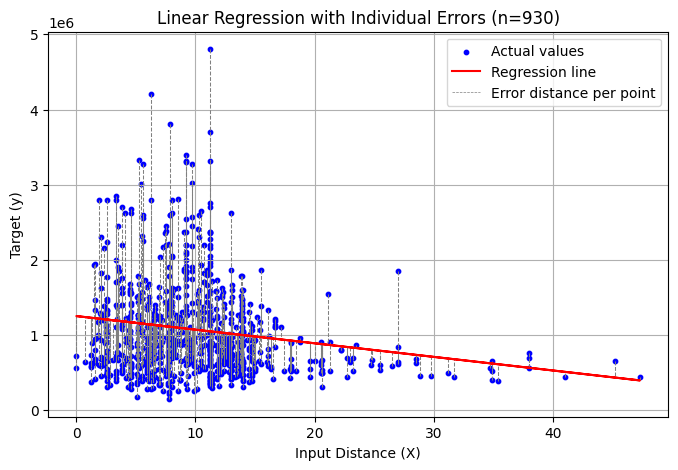

In [18]:
_plot_regression_distance_errors( X_test, y_test, estimator, input_feature_name=features[0] )

In [19]:
# _plot_regression_distance_errors( X_train, y_train, estimator )

### Collect the errors (e.g. for `Error Analysis` later on):

* Collecting the errors (related to inputs X), let's us perform `error analysis`.
* This means to analyse the relationship between input data and the model's performance (error distance - e.g. from the `Y_True` to `Y_Pred`).
* This can be useful if we want to inspect where the model performs best and worst, according to the input data.

In particular, (by looking at the plot above) our model has `large errors` in the `low-to-medium distance range` (e.g. 5 KM to 15 KM):
- So, for that part of the decision, we would investigate:
  - adding more data, or
  - adding more features or
  - a more complex model.
- Our dataset has plenty more features, so we can probably take that path.

However, for the `medium-to-far distance range` (e.g. 20 KM ++), the model performs quite well already.
- So we can might already trust its performance for that part of the decision making.

In [20]:
def get_prediction_errors( X_set, y_set ):
    errors = []
    y_pred = estimator.predict( X_set )
    for i in range(len(X_set)):
        y_true = y_set[i]
        error = y_true - y_pred[i]
        errors += [ error ]
    return np.array(errors)

errors = get_prediction_errors( X_test, y_test )
errors

array([[-5.44463469e+05],
       [-4.95968599e+04],
       [-5.87125729e+05],
       [-2.58756692e+05],
       [ 7.52004634e+04],
       [-1.55063135e+05],
       [-6.69563135e+05],
       [ 1.01358622e+05],
       [-1.72293763e+05],
       [ 9.92032430e+05],
       [-6.28934282e+04],
       [-5.98756692e+05],
       [-5.84293763e+05],
       [-2.51682550e+05],
       [-5.59115854e+05],
       [ 2.69536531e+05],
       [ 2.53743308e+05],
       [-4.09283888e+05],
       [ 2.58665065e+05],
       [-6.27893428e+05],
       [-3.11491421e+05],
       [ 3.71065718e+04],
       [-5.24272340e+05],
       [-1.45535938e+05],
       [ 8.26123457e+04],
       [ 1.22424331e+06],
       [-4.48756692e+05],
       [ 6.69684815e+05],
       [ 4.85643643e+05],
       [-7.16957695e+05],
       [-5.96166901e+05],
       [ 3.53137869e+05],
       [ 1.42358622e+05],
       [-2.10944319e+04],
       [ 7.67190589e+05],
       [ 2.62958288e+05],
       [-7.23684223e+05],
       [ 9.77902541e+04],
       [ 1.3

### Model Evaluation - Error Metrics:

Most commonly, we measure the prediction errors as an overall score for the model using an `Evaluation Metric` score.
- This metric score let's us compare our current model with another model.
- There are many many metrics to choose from (see `sklearn.metrics` docs for some of them).


For now, **we will choose only one metric - which is simple and informative:**

#### Mean Absolute Error (MAE):

- Mean absolute error tells us the average (mean) error for the model.
- It will give us back a result, `in the same scale as the target (Y)` House Price in AUD $.
- Again, we will focus on the `test set` data, which will be more representative to other real-world (future) inputs.

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = estimator.predict(X_test)

print(f"mean_absolute_error: {mean_absolute_error(y_test, y_pred):,.2f}")

mean_absolute_error: 457,617.32


* This tell us that this model is `half-a-million dollars` wrong on average!
* However, we know by looking at the errors above, that in some areas of Melbourne the model has fewer errors.

In [22]:
print('We can calculate the MAE error from our errors collected earlier.. which should be equal to the sklearn.metrics function.')

errors = get_prediction_errors( X_test, y_test )
errors
np.mean([ abs(e) for e in errors] )

We can calculate the MAE error from our errors collected earlier.. which should be equal to the sklearn.metrics function.


np.float64(457617.31752647104)

### Visualize our Model's predictions (orange), relative to True Data (blue):
- Finally, we can visualize the predictions for the model, across both the training and testing sets.

In [23]:
def _plot_visualize_performance( X_train, y_train, X_test, y_test, estimator ):
    """
    Visualize the results on the train and test data.
    """
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
    ax[0].scatter(X_train, y_train, label="Train data points", s=5)
    ax[0].plot(
        X_train,
        estimator.predict(X_train),
        linewidth=2,
        color="tab:orange",
        label="Model predictions",
    )
    ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
    ax[0].legend()
    ax[1].scatter(X_test, y_test, label="Test data points", s=5)
    ax[1].plot(X_test, y_pred, linewidth=2, color="tab:orange", label="Model predictions")
    ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
    ax[1].legend()
    fig.suptitle(estimator.__class__.__name__)

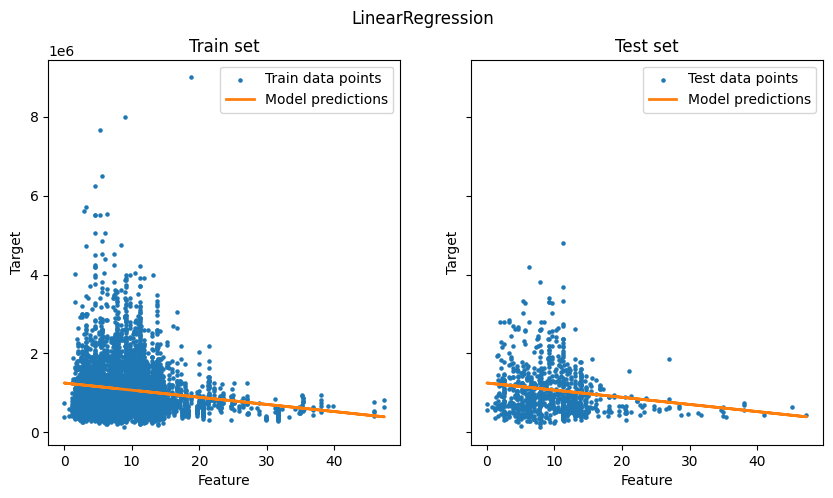

In [24]:
_plot_visualize_performance( X_train, y_train, X_test, y_test, estimator )

```














```
## 4. Decision Boundaries: Predicting between Low and High House Prices:

### Dataset - Adapt the Melbourne House Prices:
- Last week you studied about `pd.cut` (binning) in Lab05 - Data Analysis, which splits a column into equal parts.
- Today, we are going to use `pd.cut` to change the House Prices (Y) into 2 equal parts - either a `Low` or `High` price.

In [25]:
df['PriceType'] = pd.qcut(df['Price'], q=2, labels=['Low', 'High'])
target = 'PriceType'

In [26]:
print('Number of Records,  Features: ', df.shape)
print('Head of dataframe, for two example records:')
display(df[features+[target]].head(2))

print('The Y PriceType (target feature) is either Low or High price for the house or property. ***CHANGED**')
print('The X Distance (input feature) is the distance (KM) from the Central Business District in Melbourne (near the water on the map)')

Number of Records,  Features:  (6196, 22)
Head of dataframe, for two example records:


,Distance,PriceType
1,2.5,High
2,2.5,High


The Y PriceType (target feature) is either Low or High price for the house or property. ***CHANGED**
The X Distance (input feature) is the distance (KM) from the Central Business District in Melbourne (near the water on the map)


### Train / Test Set Split: - Hold-out:

In [27]:
print("First, let's separate the X features from the Y target feature(s)\n")

X = df[features].to_numpy()
y = df[target].to_numpy()


print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f'{target} - Target feature value range {list(df[target].unique())}')
display(df[target].describe())

First, let's separate the X features from the Y target feature(s)

X shape: (6196, 1), y shape: (6196,)
PriceType - Target feature value range ['High', 'Low']


count     6196
unique       2
top        Low
freq      3107
Name: PriceType, dtype: object

In [28]:
'The classes are approximately equally balanced:', 3107/6196, '%'

('The classes are approximately equally balanced:', 0.5014525500322788, '%')

In [29]:
# Split into 85% training and 15% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5266, 1), y_train shape: (5266,)
X_test shape: (930, 1), y_test shape: (930,)


### Predicting a High or Low Prices:
- This time we will use the `Logistic Regression` algorithm to predict a separating line between `Low` and `High` priced houses.

Logistic Regression uses Linear Regression to make a function (as noted in the slides), but it does so with a `One-vs-Rest` approach.
- For a `reference class`, e.g. `Low-Price` it will find a model that predicts:
    - a `1.0 value` for `Low` and
    - a `0.0 value` for any other category, e.g. `High`.
- Therefore, a score at 0.5, will be the `decision boundary`

In [30]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
estimator.fit(X_train, y_train)

LogisticRegression()

### Make a Prediction:

- Let's ask the newly fitted Model (estimator function) to predict Y.

In [31]:
input_to_predict =  X_train[0].reshape(1, -1)   # We will use the first training set data value.
                                                # We have to reshape the input as an array ([X1, X2]) for the model.predict() method.
print("Here is the first record: ",features,input_to_predict)

Here is the first record:  ['Distance'] [[11.2]]


In [32]:
y_pred = estimator.predict( input_to_predict )    # The prediction result is stored in y_pred
print(f'Here is the {target} (Y) predicted value for that record: ', y_pred )

Here is the PriceType (Y) predicted value for that record:  ['Low']


* Next we can get the `true` value for Y, for that data-point.

### Error per Data Point:

- For now, let's use the `y_pred` predicted result from above, and check whether its `True (Y) PriceType` is the same as the `Predicted (Y) PriceType`.

In [33]:
y_true = y_train[0]
y_true

'Low'

In [34]:
if y_true == y_pred[0]:
    print('there is no error!')
else:
    print('We have an error here!')

there is no error!


### Counting Errors over the Test set:
- This tells us how well the model performs.
- First, get the predictions for all of the `test set`:

In [35]:
y_pred = estimator.predict(X_test)
print('Number of records in test set:', len(X_test))

Number of records in test set: 930


* Next, we calculate how many decision errors occurred.
* The simplest way is to use `sklearn's confusion_matrix`:

In [36]:
from sklearn.metrics import confusion_matrix

def _display_cm( cm, estimator ):
    class_names = estimator.classes_
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print('Confusion Matrix: - Header row refers to Predicted Class (Pred). First column refers to Actual Class (True).')
    display(cm_df)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

In [37]:
cm = confusion_matrix(y_test, y_pred)

_display_cm( cm, estimator )

Confusion Matrix: - Header row refers to Predicted Class (Pred). First column refers to Actual Class (True).


,High,Low
High,265,188
Low,228,249


### Error Rate %:

* Next we sum-up the incorrect decisions, and divide by the total number of records, to give a `Error Rate %` for the `test set`:

In [38]:
FP = cm[0, 1]
FN = cm[1, 0]
print(f'Error I - Number of Predicted High, but should be Low:  {FP}')
print(f'Error II - Number of Predicted Low, but should be High: {FN}')
print(f'Total number records tested: {len(y_test)}')
print('The error rate % is: ')
(FP + FN) / len(y_test)

Error I - Number of Predicted High, but should be Low:  188
Error II - Number of Predicted Low, but should be High: 228
Total number records tested: 930
The error rate % is: 


np.float64(0.44731182795698926)

<p style="text-align:center;">That's it! Congratulations! <br> 
    Let's now work on your lab assigment.</p>